In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
pd.options.display.float_format = "{:,.2f}".format

In [8]:

filepath = r"advertising.csv"
data = pd.read_csv(filepath)

age = 'Age'
area_income = 'Area Income'
city = 'City'
male = 'Male'
country = 'Country'
ad_clicked = 'Clicked on Ad'
timestamp = 'Timestamp'
time_spent_on_site = 'Daily Time Spent on Site'
internet_usage = 'Daily Internet Usage'
ad_topic = 'Ad Topic Line'

data[timestamp] = pd.to_datetime(data[timestamp])

data.drop(city, axis='columns', inplace=True)

In [9]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'Male', 'Country', 'Timestamp',
       'Clicked on Ad'],
      dtype='object')

In [10]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,"61,833.90",256.09,Cloned 5thgeneration orchestration,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,"68,441.85",193.77,Monitored national standardization,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,"59,785.94",236.50,Organic bottom-line service-desk,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,"54,806.18",245.89,Triple-buffered reciprocal time-frame,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,"73,889.99",225.58,Robust logistical utilization,0,Iceland,2016-06-03 03:36:18,0


In [11]:
data[ad_clicked].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

Text(0.5, 0, 'Age')

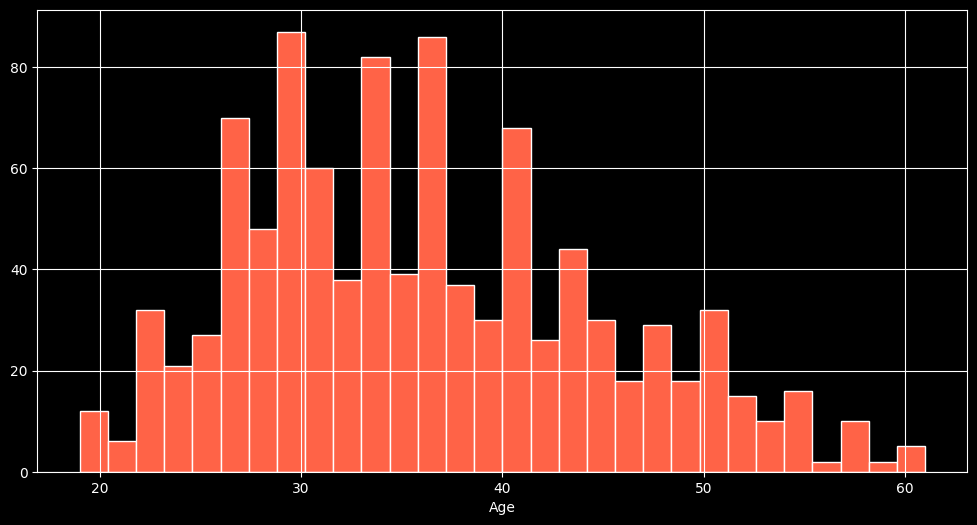

In [12]:
data[age].hist(bins=30, color='tomato', figsize=(12, 6), edgecolor='white')
plt.xlabel(age)

<Axes: xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>

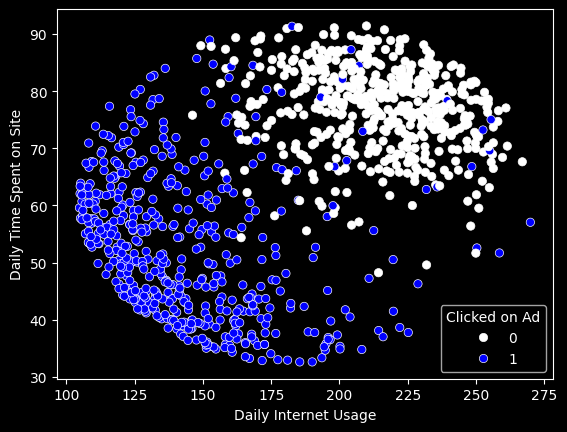

In [13]:
sns.scatterplot(
    data=data,
    x=internet_usage,
    y=time_spent_on_site,
    hue=ad_clicked,
    palette={0: "white", 1: "blue"}
)

<Axes: ylabel='Area Income'>

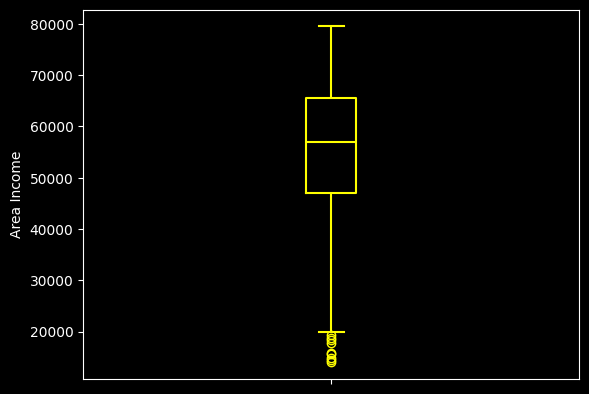

In [14]:
# plt.figure(figsize=(4, 6))
sns.boxplot(data[area_income], fill=False, color='yellow', width=0.1)

<Axes: xlabel='Area Income', ylabel='Count'>

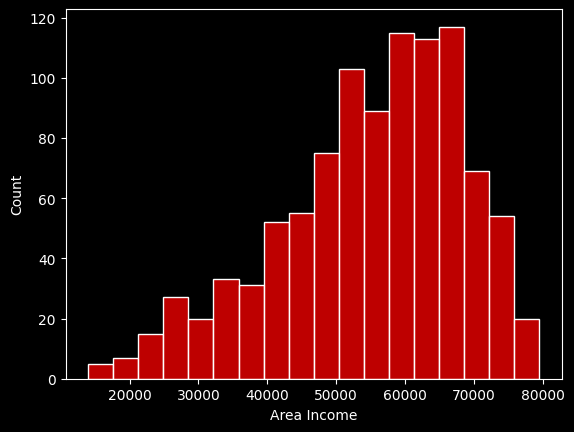

In [15]:
sns.histplot(data, x=area_income, color='red', edgecolor='white')

C:\Users\daith\AppData\Local\Temp\ipykernel_1980\102900873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ad_clicked, y=col, data=data, palette="coolwarm")


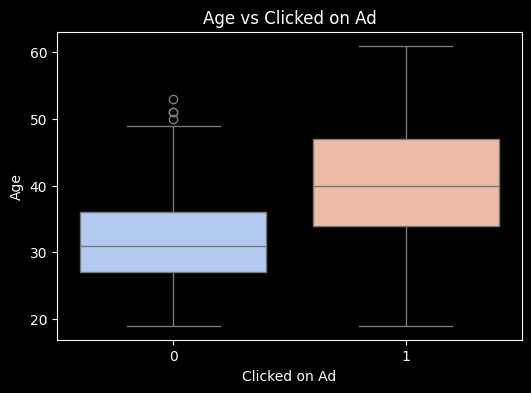

C:\Users\daith\AppData\Local\Temp\ipykernel_1980\102900873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ad_clicked, y=col, data=data, palette="coolwarm")


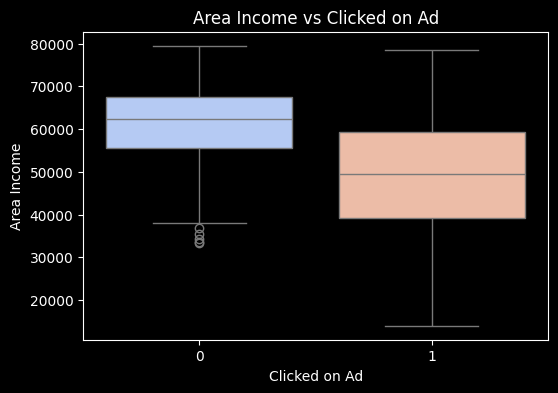

C:\Users\daith\AppData\Local\Temp\ipykernel_1980\102900873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ad_clicked, y=col, data=data, palette="coolwarm")


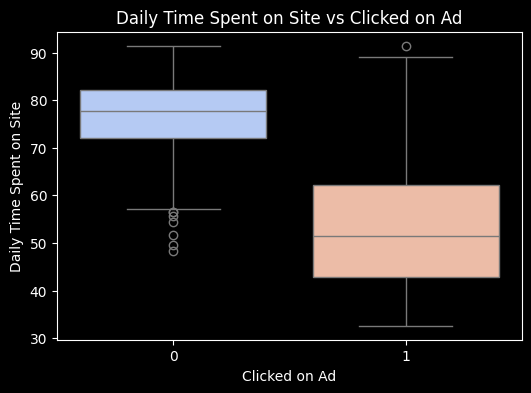

C:\Users\daith\AppData\Local\Temp\ipykernel_1980\102900873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=ad_clicked, y=col, data=data, palette="coolwarm")


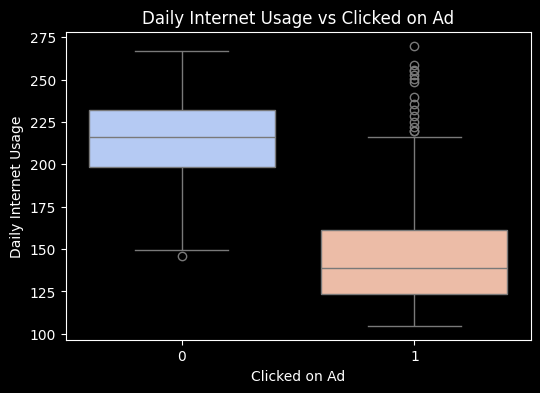

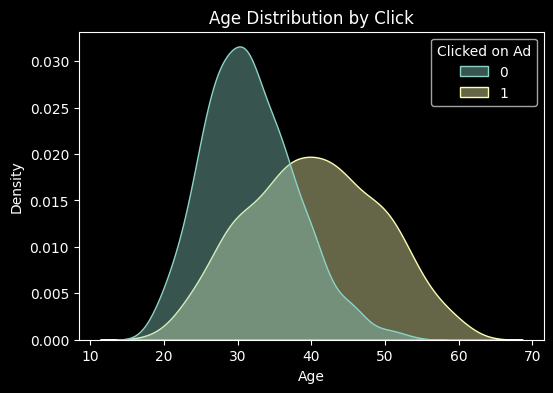

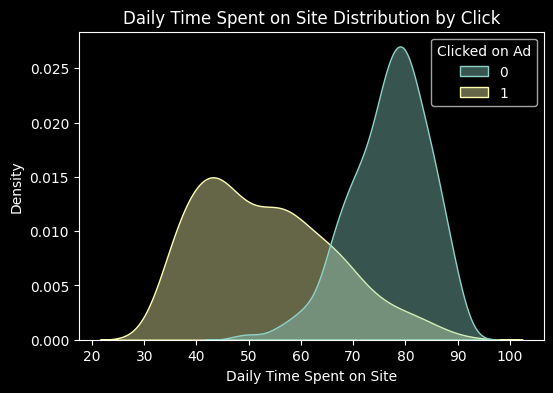

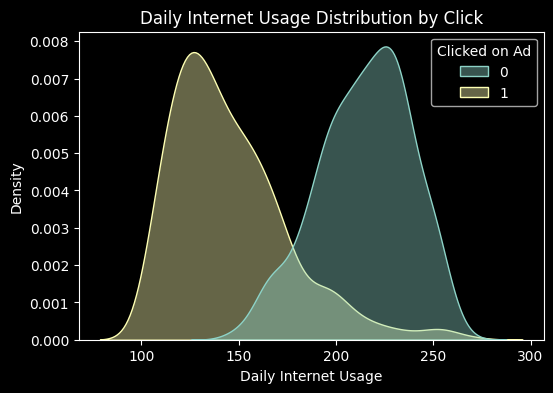

In [16]:
plt.style.use('dark_background')
# Boxplots per target
for col in [age, area_income, time_spent_on_site, internet_usage]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=ad_clicked, y=col, data=data, palette="coolwarm")
    plt.title(f"{col} vs Clicked on Ad")
    plt.show()

# KDE plots (density comparison)
for col in [age, time_spent_on_site, internet_usage]:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue=ad_clicked, fill=True, alpha=0.4)
    plt.title(f"{col} Distribution by Click")
    plt.show()


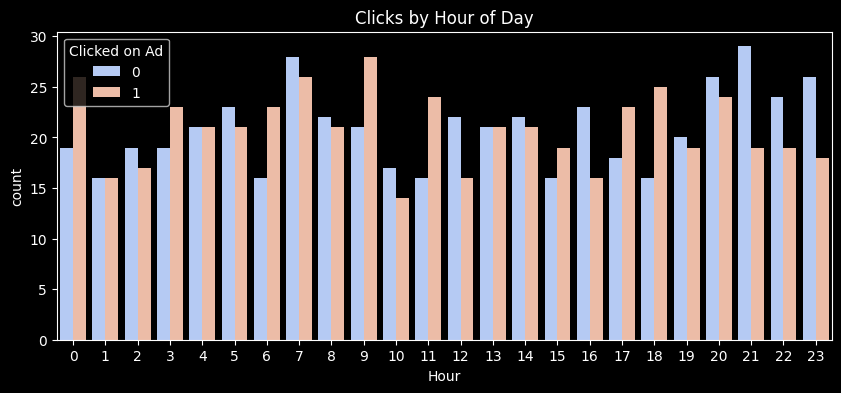

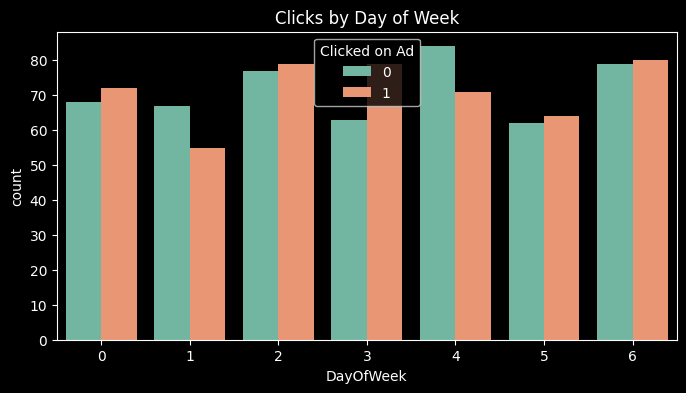

In [18]:
data["Hour"] = data[timestamp].dt.hour
data["DayOfWeek"] = data[timestamp].dt.dayofweek  # 0=Mon

plt.figure(figsize=(10,4))
sns.countplot(x="Hour", hue=ad_clicked, data=data, palette="coolwarm")
plt.title("Clicks by Hour of Day")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="DayOfWeek", hue=ad_clicked, data=data, palette="Set2")
plt.title("Clicks by Day of Week")
plt.show()

<Axes: xlabel='Male'>

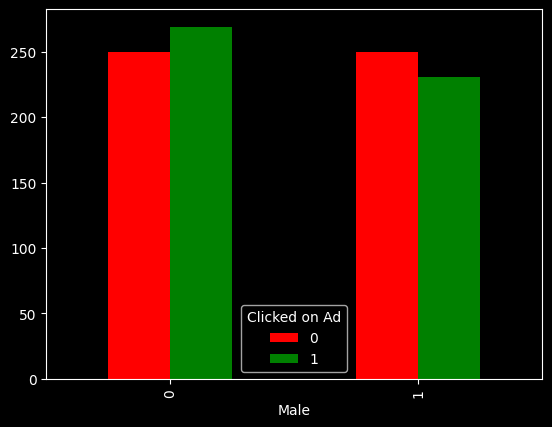

In [20]:
pd.pivot_table(
    data,
    values=age,
    index=male,
    columns=ad_clicked,
    aggfunc='count'
).plot.bar(color=['red', 'green'])

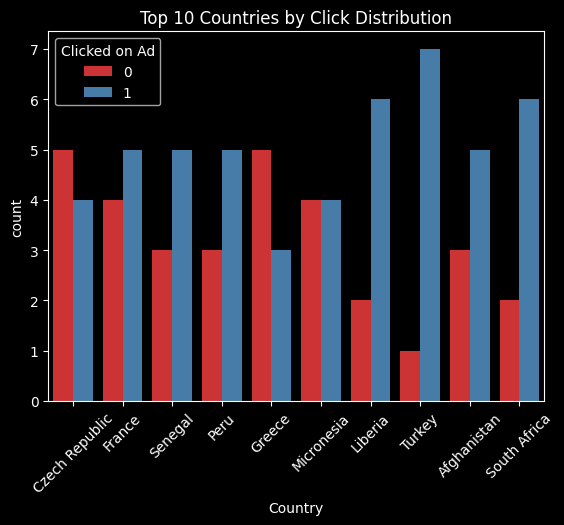

In [21]:
top_countries = data[country].value_counts().head(10).index
sns.countplot(x=country, hue=ad_clicked, data=data[data[country].isin(top_countries)],
              order=top_countries, palette="Set1")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Click Distribution")
plt.show()


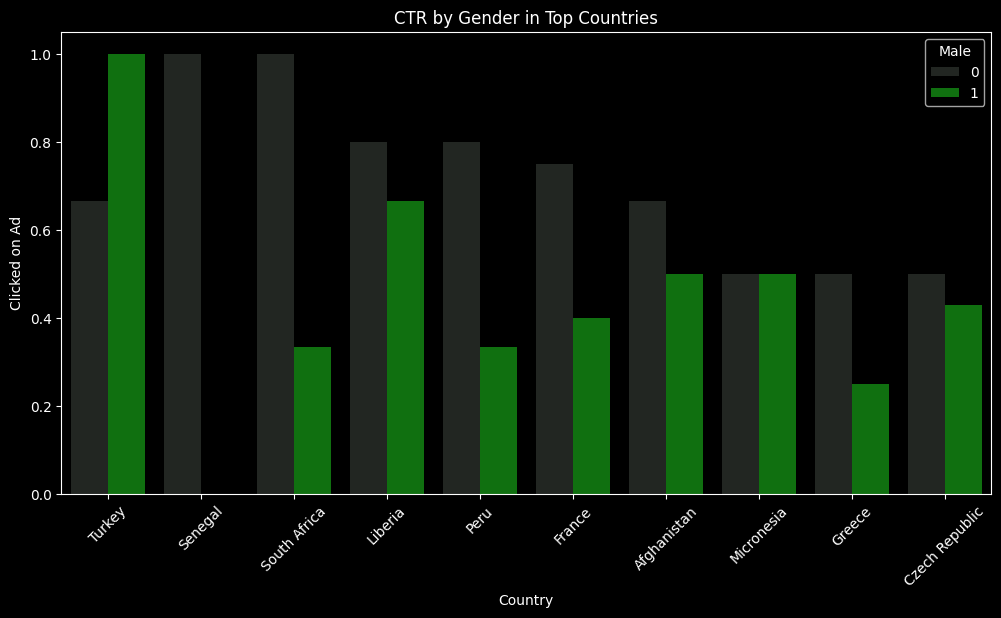

In [31]:
ctr_by_country_gender = (
    data.groupby([country, male])[ad_clicked]
    .mean()
    .reset_index()
    .sort_values(by=ad_clicked, ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(x=country, y=ad_clicked, hue=male, 
            data=ctr_by_country_gender[ctr_by_country_gender[country].isin(top_countries)],
            palette='dark:green')
plt.xticks(rotation=45)
plt.title("CTR by Gender in Top Countries")
plt.show()
